___
# Titanic Probrlem with Python

In this project, I will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set and very often is a student's first step in machine learning! 

I'll be trying to predict a classification- survival or deceased using Logistic regression and SVC. 

## Import Libraries
Let's import some libraries to get started!

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## The Data

Let's start by reading in the titanic_train.csv file into a pandas dataframe.

In [345]:
test = pd.read_csv('titanic_test.csv')
train = pd.read_csv('titanic_train.csv')

In [346]:
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


# Exploratory Data Analysis

Let's begin some exploratory data analysis! We'll start by checking out missing data!

## Missing Data

I will use seaborn to create a simple heatmap to see where I'm missing data!

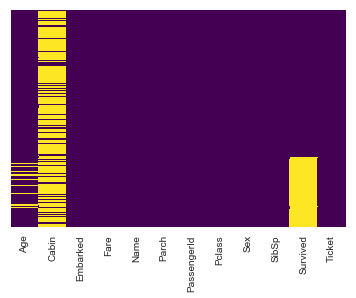

In [347]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like I'm just missing too much of that data to do something useful with at a basic level. I'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

Let's continue on by visualizing some more of the data!

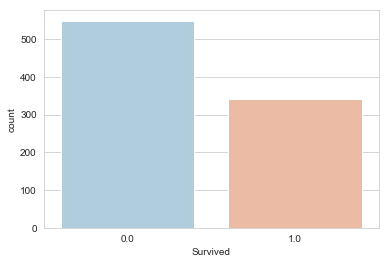

In [348]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df,palette='RdBu_r')

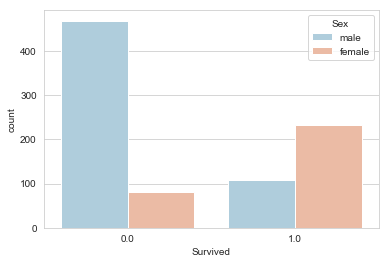

In [349]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=df,palette='RdBu_r')

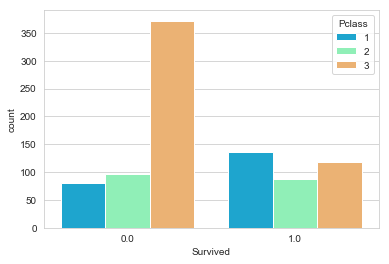

In [350]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df,palette='rainbow')

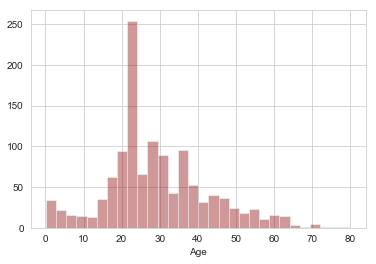

In [351]:
sns.distplot(df['Age'].dropna(),kde=False,color='darkred',bins=30)

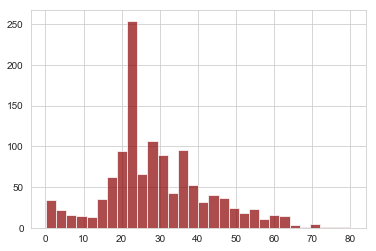

In [352]:
df['Age'].hist(bins=30,color='darkred',alpha=0.7)

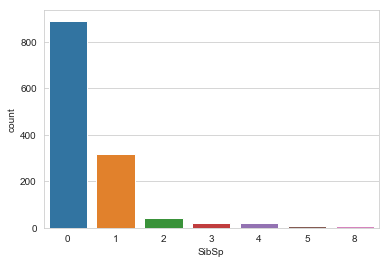

In [353]:
sns.countplot(x='SibSp',data=df)

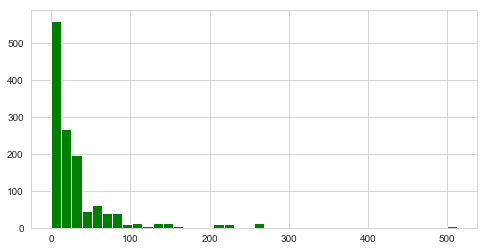

In [354]:
df['Fare'].hist(color='green',bins=40,figsize=(8,4))

____
### Cufflinks for plots
___
 Let's take a quick moment to show an example of cufflinks!

In [355]:
import cufflinks as cf
cf.go_offline()

In [356]:
df['Fare'].iplot(kind='hist',bins=30,color='green')

___
## Data Cleaning
I want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).
However I can be smarter about this and check the average age by passenger class. For example:


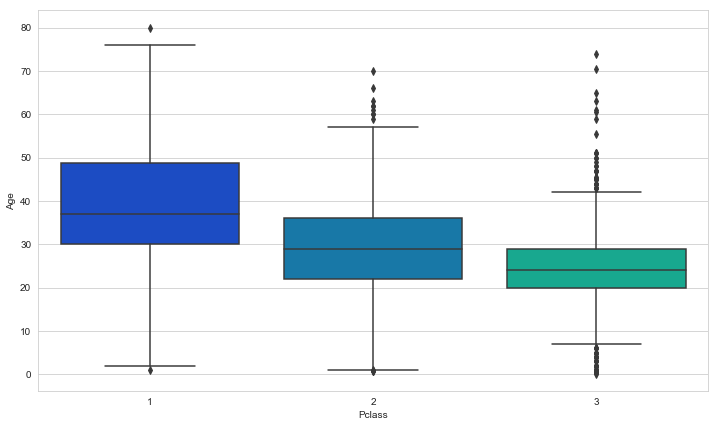

In [357]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

I can see the wealthier passengers in the higher classes tend to be older, which makes sense. I'll use these average age values to impute based on Pclass for Age.

In [358]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

Now apply that function!

In [359]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

Now let's check that heat map again!

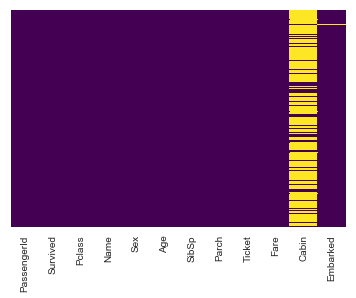

In [360]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Great! Let's go ahead and drop the Cabin column and the row in Embarked that is NaN.

In [361]:
df.drop('Cabin',axis=1,inplace=True)

In [362]:
df.head()

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [363]:
df.dropna(inplace=True)

In [364]:
df[ 'Title' ] = df[ 'Name' ].map( lambda name: name.split( ',' )[1].split( '.' )[0].strip() )

In [365]:
df.head()

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs
2,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss
3,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs
4,35.0,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr


In [366]:
Title_Dictionary = {
                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                    "Dr":         "Officer",
                    "Rev":        "Officer",
                    "the Countess":"Royalty",
                    "Dona":       "Royalty",
                    "Mme":        "Mrs",
                    "Mlle":       "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mr",
                    "Mrs" :       "Mrs",
                    "Miss" :      "Miss",
                    "Master" :    "Master",
                    "Lady" :      "Royalty"

                    }

In [367]:
df[ 'Title' ] = df.Title.map( Title_Dictionary )

In [368]:
df.head()

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs
2,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss
3,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs
4,35.0,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr


## Converting Categorical Features 

I'll need to convert categorical features to dummy variables using pandas! Otherwise my machine learning algorithm won't be able to directly take in those features as inputs.

In [369]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
Age            889 non-null float64
Embarked       889 non-null object
Fare           889 non-null float64
Name           889 non-null object
Parch          889 non-null int64
PassengerId    889 non-null int64
Pclass         889 non-null int64
Sex            889 non-null object
SibSp          889 non-null int64
Survived       889 non-null float64
Ticket         889 non-null object
Title          889 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 90.3+ KB


In [370]:
df.head()

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs
2,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss
3,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs
4,35.0,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr


In [371]:
sex = pd.get_dummies(df['Sex'],drop_first=True)
embark = pd.get_dummies(df['Embarked'],drop_first=True)
Pclass = pd.get_dummies(df['Pclass'], drop_first = True)
Title = pd.get_dummies(df['Title'], drop_first = True)

In [372]:
df.drop(['Sex','Embarked','Name','Ticket','Pclass','Title'],axis=1,inplace=True)

In [373]:
df_final = pd.concat([df,sex,embark,Pclass,Title],axis=1)

In [374]:
df_final.head()

,Age,Fare,Parch,PassengerId,SibSp,Survived,male,Q,S,2,3,Miss,Mr,Mrs,Officer,Royalty
0,22.0,7.2500,0,1,1,0.0,1,0,1,0,1,0,1,0,0,0
1,38.0,71.2833,0,2,1,1.0,0,0,0,0,0,0,0,1,0,0
2,26.0,7.9250,0,3,0,1.0,0,0,1,0,1,1,0,0,0,0
3,35.0,53.1000,0,4,1,1.0,0,0,1,0,0,0,0,1,0,0
4,35.0,8.0500,0,5,0,0.0,1,0,1,0,1,0,1,0,0,0


In [375]:
df_final.drop('PassengerId', axis = 1, inplace = True)

In [376]:
df_final.head()

,Age,Fare,Parch,SibSp,Survived,male,Q,S,2,3,Miss,Mr,Mrs,Officer,Royalty
0,22.0,7.2500,0,1,0.0,1,0,1,0,1,0,1,0,0,0
1,38.0,71.2833,0,1,1.0,0,0,0,0,0,0,0,1,0,0
2,26.0,7.9250,0,0,1.0,0,0,1,0,1,1,0,0,0,0
3,35.0,53.1000,0,1,1.0,0,0,1,0,0,0,0,1,0,0
4,35.0,8.0500,0,0,0.0,1,0,1,0,1,0,1,0,0,0


Great! Our data is ready for our model!

# Building a Logistic Regression model and SVC

Let's start by splitting data into a training set and test set.

## Train Test Split

In [377]:
from sklearn.model_selection import train_test_split

In [378]:
x = df_final.drop('Survived', axis = 1 )

y = df_final['Survived']

In [379]:
X_train, X_test, y_train, y_test = train_test_split(x, y ,test_size=0.30, random_state=101)
                                            
                                        

## Training and Predicting

In [380]:
#first model
from sklearn.linear_model import LogisticRegression

In [381]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [382]:
predictions = logmodel.predict(X_test)

In [385]:
# the second model
from sklearn.svm import SVC

In [386]:
svc_model = SVC()
svc_model.fit(X_train, y_train)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [387]:
predictions_svc = svc_model.predict(X_test)

Let's move on to evaluate the models!

## Evaluation

We can check precision,recall,f1-score using classification report!

In [383]:
from sklearn.metrics import classification_report

In [384]:
# evaluating the first model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.84      0.93      0.88       163
         1.0       0.87      0.71      0.78       104

   micro avg       0.85      0.85      0.85       267
   macro avg       0.85      0.82      0.83       267
weighted avg       0.85      0.85      0.84       267



In [388]:
print(classification_report(y_test,predictions_svc))

              precision    recall  f1-score   support

         0.0       0.77      0.80      0.79       163
         1.0       0.67      0.63      0.65       104

   micro avg       0.73      0.73      0.73       267
   macro avg       0.72      0.72      0.72       267
weighted avg       0.73      0.73      0.73       267



### Conclusion : 
    
  Logistic Regression model is performing better than SVC !  

In [395]:
pred = pd.Series(logmodel.predict(X_test), name='Survived')
results = pd.concat([test['PassengerId'], pred], axis=1)
results.to_csv("submission.csv", index=False)
results.head(10)

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,1.0
3,895,1.0
4,896,0.0
5,897,0.0
6,898,0.0
7,899,0.0
8,900,0.0
9,901,1.0
